In [118]:
import pandas as pd

# List of file names
file_names = ['forest_land.csv', 'arable_land.csv', 'GDP.csv', 'CO2.csv','population.csv','energy_consumption.csv']  # Add your file names

# Read the data from each file
dfs = [pd.read_csv(file, encoding='latin-1') for file in file_names]

# Select specific countries
selected_countries = ['Armenia', 'Pakistan', 'United States', 'China']

# Save selected rows for each country into different output files
for i, df in enumerate(dfs):
    selected_rows = df[df['Country Name'].isin(selected_countries)]
    output_file = f'{file_names[i]}'  # Unique output file name
    selected_rows.to_csv(output_file, index=False)
    print(f"Selected Rows from File {i + 1} Saved to: {output_file}")


Selected Rows from File 1 Saved to: forest_land.csv
Selected Rows from File 2 Saved to: arable_land.csv
Selected Rows from File 3 Saved to: GDP.csv
Selected Rows from File 4 Saved to: CO2.csv
Selected Rows from File 5 Saved to: population.csv
Selected Rows from File 6 Saved to: energy_consumption.csv


In [119]:
a = dfs[0]['Country Name']
country_name = []
for name in a:
    country_name.append(name)

country_name

['Armenia', 'China', 'Pakistan', 'United States']

In [120]:
import pandas as pd
import numpy as np

def read_preprocess_and_transpose(filename):
    """
    Reads, preprocesses, and transposes a World Bank format CSV file.

    Parameters:
        filename (str): The name of the CSV file.

    Returns:
        pd.DataFrame: The DataFrame after preprocessing.
        pd.DataFrame: The transposed DataFrame.
    """
    try:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(filename, encoding='latin-1', na_values=['..'])  # Adjust encoding if needed

        # Specify the columns to be removed
        columns_to_remove = ['Series Name', 'Series Code', 'Country Code','2013 [YR2013]',	'2014 [YR2014]','2016 [YR2016]',	'2017 [YR2017]','2018 [YR2018]',	'2019 [YR2019]', '2021 [YR2021]', '2022 [YR2022]']

        # Remove the specified columns
        df = df.drop(columns=columns_to_remove, errors='ignore')

        # Remove rows with NaN values
        df = df.dropna()

        # Transpose the DataFrame
        transposed_df = df.set_index('Country Name').transpose()

        # Fill NaN values with the mean of each column
        transposed_df = transposed_df.apply(pd.to_numeric, errors='coerce')
        transposed_df = transposed_df.apply(lambda col: col.fillna(col.mean()))

        return df, transposed_df

    except Exception as e:
        print(f"Error reading or processing CSV file: {e}")
        return None, None

# Example usage:
filename = 'CO2.csv'  # Replace with the actual file name
df, df_transposed = read_preprocess_and_transpose(filename)

if df is not None and df_transposed is not None:
    print("DataFrame after removing specified columns and filling NaN values with the mean:")
    print(df)
    print("\nTransposed DataFrame:")
    print(df_transposed)
else:
    print("Failed to read or process the CSV file.")


DataFrame after removing specified columns and filling NaN values with the mean:
    Country Name  1990 [YR1990]  2000 [YR2000]  2015 [YR2015]  2020 [YR2020]
0        Armenia   2.438903e+04   5.990513e+03   9.155783e+03   1.042204e+04
1          China   3.238859e+06   4.567274e+06   1.180470e+07   1.294287e+07
2       Pakistan   1.604952e+05   2.335853e+05   3.756367e+05   4.366089e+05
3  United States   5.855541e+06   6.810656e+06   6.112057e+06   5.505181e+06

Transposed DataFrame:
Country Name        Armenia         China     Pakistan  United States
1990 [YR1990]  24389.028250  3.238859e+06  160495.1617    5855541.470
2000 [YR2000]   5990.512959  4.567274e+06  233585.3354    6810655.857
2015 [YR2015]   9155.783080  1.180470e+07  375636.6688    6112057.281
2020 [YR2020]  10422.041170  1.294287e+07  436608.9225    5505180.890


In [127]:
df_CO2, df_transposed_CO2 = read_preprocess_and_transpose('CO2.csv')
df_energy_conusmption, df_transposed_energy_consumption = read_preprocess_and_transpose('energy_consumption.csv')
df_arable_laned, df_transposed_arable_land = read_preprocess_and_transpose('arable_land.csv')
df_forest_land, df_transposed_forest_land = read_preprocess_and_transpose('forest_land.csv')
df_GDP, df_transposed_GDP = read_preprocess_and_transpose('GDP.csv')
df_population, df_transposed_population = read_preprocess_and_transpose('population.csv')


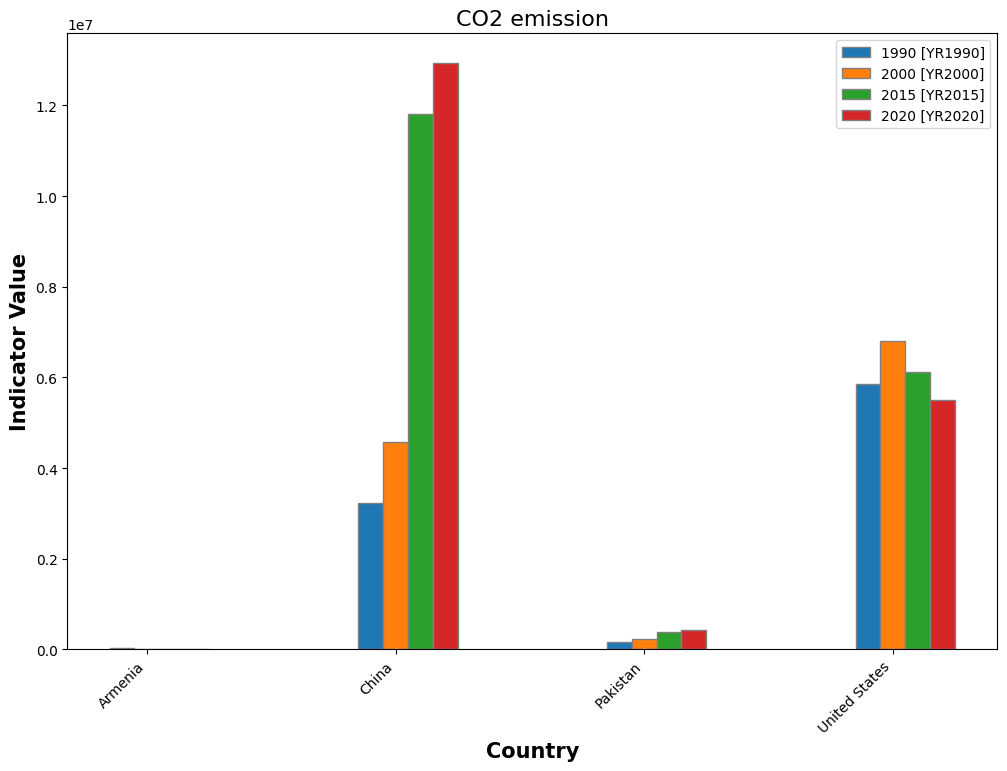

In [128]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming df_transposed is your transposed DataFrame
# If it's not, replace df_transposed with your actual DataFrame

# Extract the country names and years from the DataFrame
countries = df_transposed_CO2.columns.tolist()
years = df_transposed_CO2.index.tolist()

# set width of bar
barWidth = 0.10
fig = plt.subplots(figsize=(12, 8))

# Set position of bar on X axis
br1 = np.arange(len(countries))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
for idx, year in enumerate(years):
    plt.bar(br1 + idx * barWidth, df_transposed.loc[year], width=barWidth, edgecolor='grey', label=year)

# Adding Xticks
plt.xlabel('Country', fontweight='bold', fontsize=15)
plt.ylabel('Indicator Value', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth for r in range(len(countries))], countries, rotation=45, ha='right')
plt.title('CO2 emission', fontsize=16)
plt.legend()
plt.show()


In [159]:
df_population

,Country Name,1990 [YR1990],2000 [YR2000],2015 [YR2015],2020 [YR2020]
0,Armenia,3.093959,-1.176786,-0.392995,-0.533007
1,China,1.467303,0.787957,0.581456,0.238041
2,Pakistan,3.297471,3.075553,1.296552,1.733028
3,United States,1.129651,1.112769,0.736217,0.964348


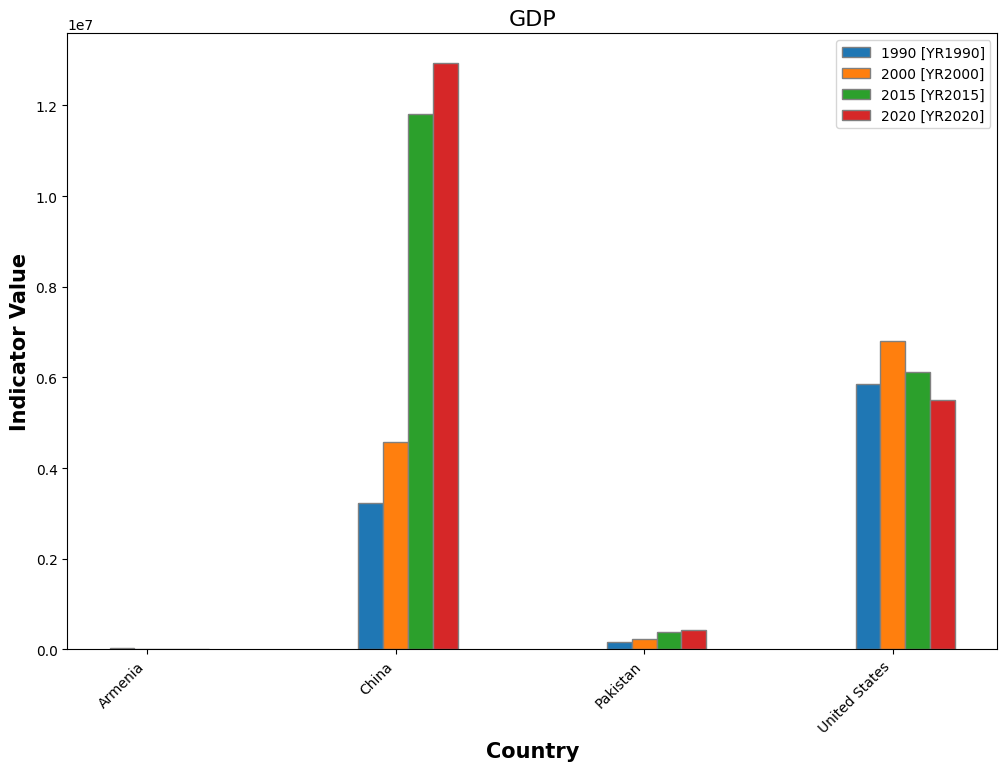

In [161]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming df_transposed is your transposed DataFrame
# If it's not, replace df_transposed with your actual DataFrame

# Extract the country names and years from the DataFrame
countries = df_transposed_GDP.columns.tolist()
years = df_transposed_GDP.index.tolist()

# set width of bar
barWidth = 0.10
fig = plt.subplots(figsize=(12, 8))

# Set position of bar on X axis
br1 = np.arange(len(countries))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
for idx, year in enumerate(years):
    plt.bar(br1 + idx * barWidth, df_transposed.loc[year], width=barWidth, edgecolor='grey', label=year)

# Adding Xticks
plt.xlabel('Country', fontweight='bold', fontsize=15)
plt.ylabel('Indicator Value', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth for r in range(len(countries))], countries, rotation=45, ha='right')
plt.title('GDP', fontsize=16)
plt.legend()
plt.show()


In [150]:
df_CO2.describe()

,1990 [YR1990],2000 [YR2000],2015 [YR2015],2020 [YR2020]
count,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
mean,2.319821e+06,2.904377e+06,4.575387e+06,4.723770e+06
std,2.785537e+06,3.344549e+06,5.571135e+06,6.021062e+06
min,2.438903e+04,5.990513e+03,9.155783e+03,1.042204e+04
25%,1.264686e+05,1.766866e+05,2.840164e+05,3.300622e+05
50%,1.699677e+06,2.400430e+06,3.243847e+06,2.970895e+06
75%,3.893029e+06,5.128120e+06,7.535217e+06,7.364603e+06
max,5.855541e+06,6.810656e+06,1.180470e+07,1.294287e+07


In [167]:
import pandas as pd

# List of file names
file_names = ['forest_land.csv', 'arable_land.csv', 'GDP.csv', 'CO2.csv', 'population.csv', 'energy_consumption.csv']

# Read the data from each file into a dictionary of DataFrames
data = {}
for file_name in file_names:
    data[file_name.split('.')[0]] = pd.read_csv(file_name, encoding='latin-1')

# Extract data for China from each file
china_data = {key: df[df['Country Name'] == 'China'] for key, df in data.items()}

# Merge the DataFrames into a single DataFrame
merged_china_data = pd.concat(china_data.values(), axis=0)

# Display the merged China data
merged_china_data.to_csv("merged_china_data.csv")

In [170]:
merged_china_data

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
1,Forest area (% of land area),AG.LND.FRST.ZS,China,CHN,16.73800655,1.885347e+01,2.198722e+01,2.219352e+01,2.239982e+01,2.263050e+01,2.283071e+01,2.303091e+01,2.323112e+01,2.343132e+01,23.631528,..
1,Arable land (% of land area),AG.LND.ARBL.ZS,China,CHN,13.18669614,1.267972e+01,1.239591e+01,1.231365e+01,1.223564e+01,1.208450e+01,1.193336e+01,1.178221e+01,1.162756e+01,1.160626e+01,11.595608,..
1,GDP (current US$),NY.GDP.MKTP.CD,China,CHN,360858000000.0,1.211330e+12,9.570470e+12,1.047560e+13,1.106160e+13,1.123330e+13,1.231050e+13,1.389490e+13,1.428000e+13,1.468770e+13,17820500000000.0,17963200000000.0
1,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,China,CHN,3238858.656,4.567274e+06,1.186184e+07,1.194074e+07,1.180470e+07,1.177334e+07,1.201420e+07,1.252434e+07,1.273225e+07,1.294287e+07,..,..
1,Population growth (annual %),SP.POP.GROW,China,CHN,1.467303,7.879566e-01,6.660730e-01,6.303264e-01,5.814561e-01,5.730509e-01,6.052450e-01,4.676721e-01,3.547409e-01,2.380409e-01,0.089252,-0.0131
1,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,China,CHN,33.91,2.963000e+01,1.147000e+01,1.191000e+01,1.218000e+01,1.260000e+01,1.314000e+01,1.355000e+01,1.433000e+01,1.481000e+01,..,..


In [168]:

columns_to_remove = ['Series Name', 'Series Code', 'Country Code','2013 [YR2013]',	'2014 [YR2014]','2016 [YR2016]',	'2017 [YR2017]','2018 [YR2018]',	'2019 [YR2019]', '2021 [YR2021]', '2022 [YR2022]']

# Remove the specified columns
merged_china_data = merged_china_data.drop(columns=columns_to_remove, errors='ignore')


,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
1,Forest area (% of land area),AG.LND.FRST.ZS,China,CHN,16.73800655,1.885347e+01,2.198722e+01,2.219352e+01,2.239982e+01,2.263050e+01,2.283071e+01,2.303091e+01,2.323112e+01,2.343132e+01,23.631528,..
1,Arable land (% of land area),AG.LND.ARBL.ZS,China,CHN,13.18669614,1.267972e+01,1.239591e+01,1.231365e+01,1.223564e+01,1.208450e+01,1.193336e+01,1.178221e+01,1.162756e+01,1.160626e+01,11.595608,..
1,GDP (current US$),NY.GDP.MKTP.CD,China,CHN,360858000000.0,1.211330e+12,9.570470e+12,1.047560e+13,1.106160e+13,1.123330e+13,1.231050e+13,1.389490e+13,1.428000e+13,1.468770e+13,17820500000000.0,17963200000000.0
1,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,China,CHN,3238858.656,4.567274e+06,1.186184e+07,1.194074e+07,1.180470e+07,1.177334e+07,1.201420e+07,1.252434e+07,1.273225e+07,1.294287e+07,..,..
1,Population growth (annual %),SP.POP.GROW,China,CHN,1.467303,7.879566e-01,6.660730e-01,6.303264e-01,5.814561e-01,5.730509e-01,6.052450e-01,4.676721e-01,3.547409e-01,2.380409e-01,0.089252,-0.0131
1,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,China,CHN,33.91,2.963000e+01,1.147000e+01,1.191000e+01,1.218000e+01,1.260000e+01,1.314000e+01,1.355000e+01,1.433000e+01,1.481000e+01,..,..


In [166]:
df_china, df_transposed_china = read_preprocess_and_transpose('merged_china_data.csv')
df_china

,Unnamed: 0,Country Name,1990 [YR1990],2000 [YR2000],2015 [YR2015],2020 [YR2020]
0,1,China,1.673801e+01,1.885347e+01,2.239982e+01,2.343132e+01
1,1,China,1.318670e+01,1.267972e+01,1.223564e+01,1.160626e+01
2,1,China,3.608580e+11,1.211330e+12,1.106160e+13,1.468770e+13
3,1,China,3.238859e+06,4.567274e+06,1.180470e+07,1.294287e+07
4,1,China,1.467303e+00,7.879566e-01,5.814561e-01,2.380409e-01
5,1,China,3.391000e+01,2.963000e+01,1.218000e+01,1.481000e+01


In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
merged_china_data.corr()


ValueError: could not convert string to float: 'Forest area (% of land area)'